<a href="https://colab.research.google.com/github/L-ar09/backend-repo/blob/main/ADG_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Information:
Shape: (891, 12)

Dataset Overview:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S 

<ipython-input-4-59387b9f1a3b>:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = titanic_df.dropna(subset=['AgeBin']).groupby('AgeBin')['Survived'].mean() * 100



Survival rates by age group:
Child (0-12): 57.97%
Teen (13-18): 42.86%
Young Adult (19-35): 38.27%
Adult (36-60): 40.00%
Senior (61+): 22.73%

Survival rates by port of embarkation:
Cherbourg: 55.36%
Queenstown: 38.96%
Southampton: 33.70%

Survival rates by family size:
Size 1: 30.35%
Size 2: 55.28%
Size 3: 57.84%
Size 4: 72.41%
Size 5: 20.00%
Size 6: 13.64%
Size 7: 33.33%

Evaluation:
Accuracy: 0.7799
Precision: 0.7500
Recall: 0.7027
F1 Score: 0.7256

Confusion Matrix:
[[131  26]
 [ 33  78]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       157
           1       0.75      0.70      0.73       111

    accuracy                           0.78       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268


Feature Engineering
Imputed 177 missing age values using a RandomForest model.
Enhanced Model with Feature Engineering:
Accuracy: 0.7873
Precision: 0

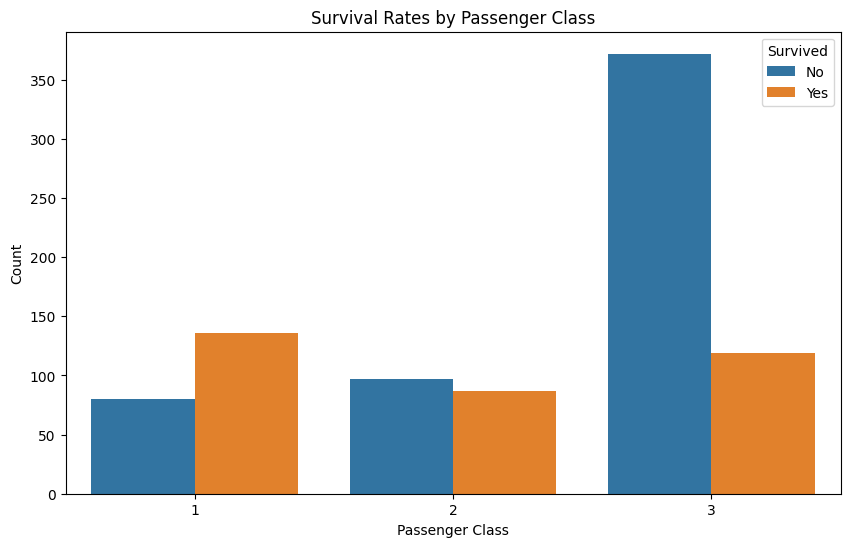

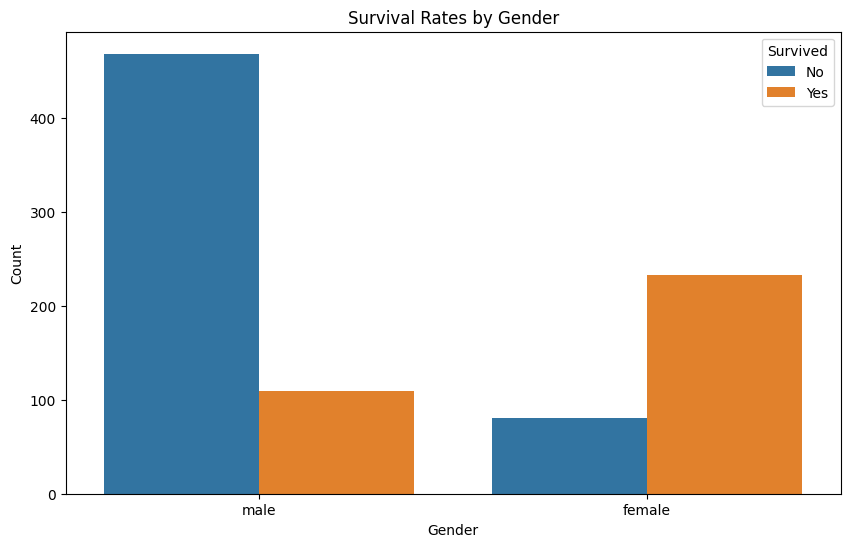

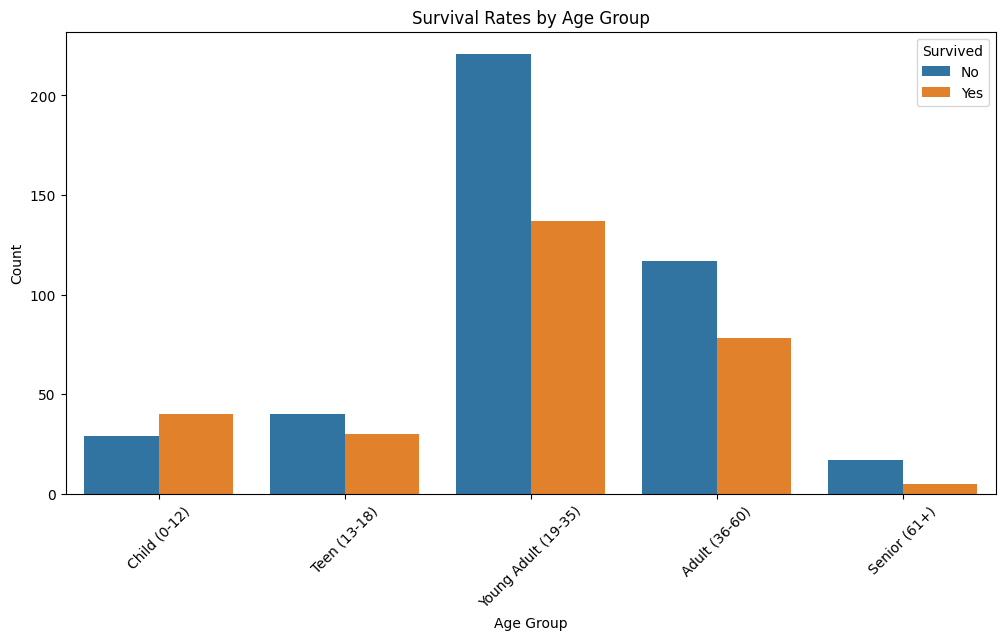

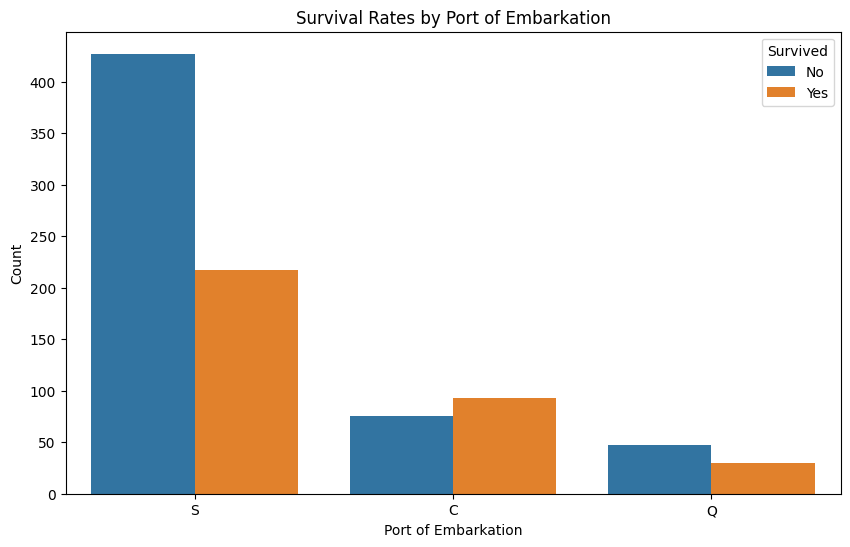

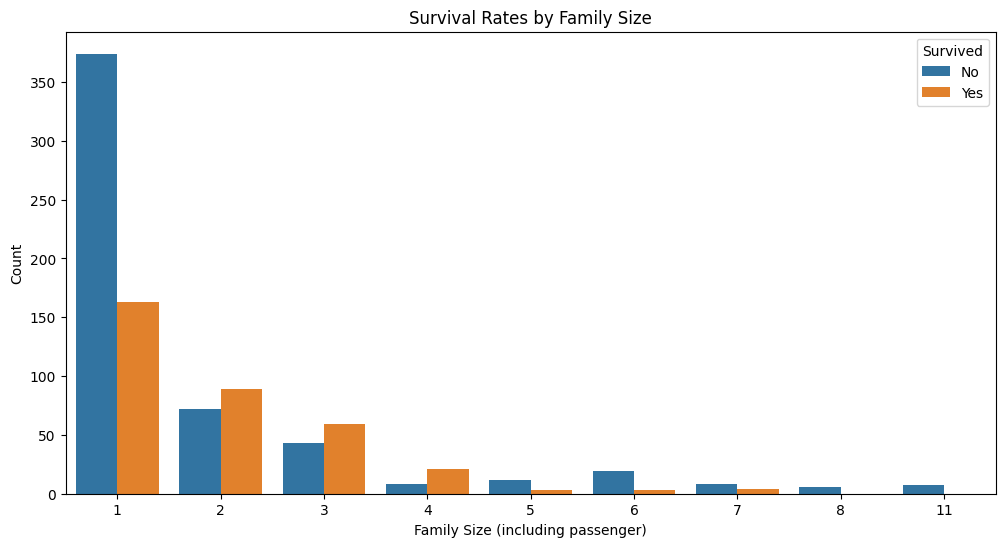

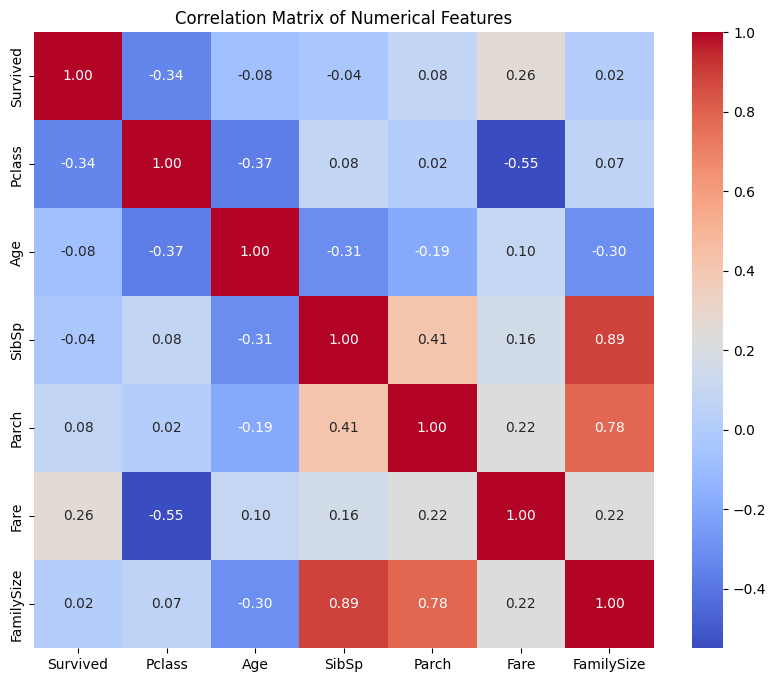

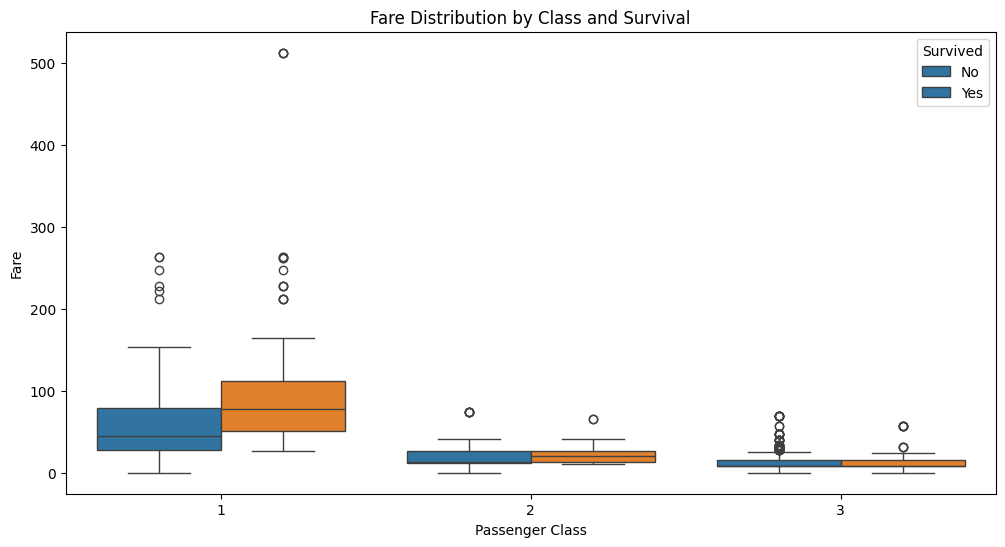

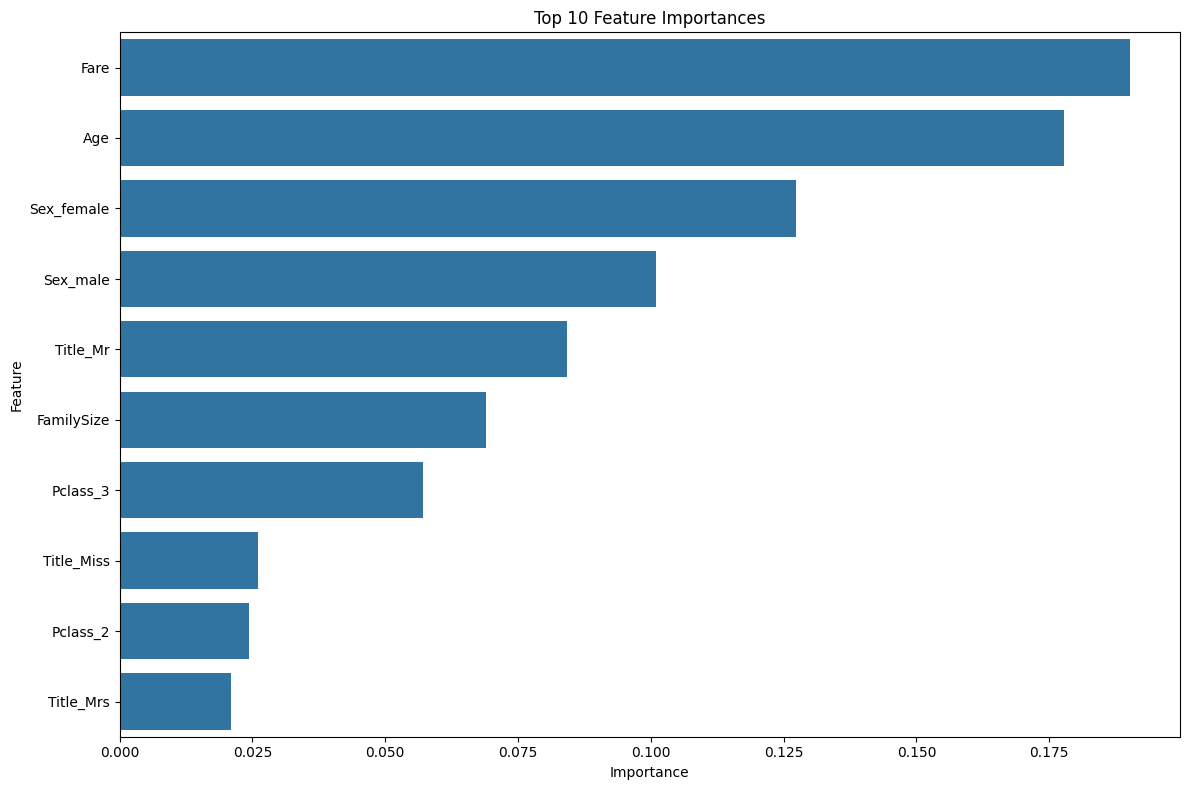

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

titanic_df = pd.read_csv('/content/Titanic-Dataset.csv')

print("Dataset Information:")
print(f"Shape: {titanic_df.shape}")
print("\nDataset Overview:")
print(titanic_df.head())

print("\nBasic Statistical Summary:")
print(titanic_df.describe())

print("\nMissing Values:")
print(titanic_df.isnull().sum())

survival_rate = titanic_df['Survived'].mean() * 100
print(f"\nOverall survival rate: {survival_rate:.2f}%")

plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=titanic_df)
plt.title('Survival Rates by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])

class_survival = titanic_df.groupby('Pclass')['Survived'].mean() * 100
print("\nSurvival rates by passenger class:")
for pclass, rate in class_survival.items():
    print(f"Class {pclass}: {rate:.2f}%")

plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='Survived', data=titanic_df)
plt.title('Survival Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])

gender_survival = titanic_df.groupby('Sex')['Survived'].mean() * 100
print("\nSurvival rates by gender:")
for gender, rate in gender_survival.items():
    print(f"{gender.capitalize()}: {rate:.2f}%")

plt.figure(figsize=(12, 6))
titanic_df['AgeBin'] = pd.cut(titanic_df['Age'], bins=[0, 12, 18, 35, 60, 100],
                            labels=['Child (0-12)', 'Teen (13-18)', 'Young Adult (19-35)',
                                    'Adult (36-60)', 'Senior (61+)'])
sns.countplot(x='AgeBin', hue='Survived', data=titanic_df)
plt.title('Survival Rates by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.xticks(rotation=45)

age_survival = titanic_df.dropna(subset=['AgeBin']).groupby('AgeBin')['Survived'].mean() * 100
print("\nSurvival rates by age group:")
for age_group, rate in age_survival.items():
    print(f"{age_group}: {rate:.2f}%")

plt.figure(figsize=(10, 6))
sns.countplot(x='Embarked', hue='Survived', data=titanic_df)
plt.title('Survival Rates by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])

embarked_survival = titanic_df.dropna(subset=['Embarked']).groupby('Embarked')['Survived'].mean() * 100
print("\nSurvival rates by port of embarkation:")
for port, rate in embarked_survival.items():
    port_map = {'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'}
    port_name = port_map.get(port, port)
    print(f"{port_name}: {rate:.2f}%")

titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1
plt.figure(figsize=(12, 6))
sns.countplot(x='FamilySize', hue='Survived', data=titanic_df)
plt.title('Survival Rates by Family Size')
plt.xlabel('Family Size (including passenger)')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])

family_survival = titanic_df.groupby('FamilySize')['Survived'].mean() * 100
print("\nSurvival rates by family size:")
for size, rate in family_survival.items():
    if titanic_df[titanic_df['FamilySize'] == size].shape[0] > 10:
        print(f"Size {size}: {rate:.2f}%")

plt.figure(figsize=(10, 8))
numerical_features = titanic_df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize']]
correlation = numerical_features.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')

plt.figure(figsize=(12, 6))
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=titanic_df)
plt.title('Fare Distribution by Class and Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.legend(title='Survived', labels=['No', 'Yes'])

#Task 2 ML
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = titanic_df[features]
y = titanic_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = ['Sex', 'Embarked', 'Pclass']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nEvaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nFeature Engineering")

titanic_fe = titanic_df.copy()

if 'Name' in titanic_fe.columns:
    titanic_fe['Title'] = titanic_fe['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

    title_mapping = {
        'Mr': 'Mr',
        'Mrs': 'Mrs',
        'Miss': 'Miss',
        'Master': 'Master',
        'Dr': 'Officer',
        'Rev': 'Officer',
        'Col': 'Officer',
        'Major': 'Officer',
        'Mlle': 'Miss',
        'Mme': 'Mrs',
        'Don': 'Officer',
        'Sir': 'Officer',
        'Countess': 'Mrs',
        'Jonkheer': 'Officer',
        'Lady': 'Mrs',
        'Capt': 'Officer',
        'Ms': 'Mrs',
        'Dona': 'Mrs'
    }

    titanic_fe['Title'] = titanic_fe['Title'].map(title_mapping)
    titanic_fe['Title'] = titanic_fe['Title'].fillna('Other')
else:
    print("Name column not found. Creating dummy Title feature.")
    titanic_fe['Title'] = 'Unknown'

titanic_fe['FamilySize'] = titanic_fe['SibSp'] + titanic_fe['Parch'] + 1

titanic_fe['IsAlone'] = (titanic_fe['FamilySize'] == 1).astype(int)

if titanic_fe['Fare'].isnull().sum() > 0:
    fare_median = titanic_fe.groupby('Pclass')['Fare'].transform('median')
    titanic_fe['Fare'] = titanic_fe['Fare'].fillna(fare_median)

titanic_fe['FareBin'] = pd.qcut(titanic_fe['Fare'], 5, labels=False, duplicates='drop')

titanic_fe['IsChild'] = (titanic_fe['Age'] < 16).astype(int)

titanic_fe['Pclass_Sex'] = titanic_fe['Pclass'].astype(str) + '_' + titanic_fe['Sex']

if titanic_fe['Age'].isnull().sum() > 0:
    age_features = ['Pclass', 'SibSp', 'Parch', 'Fare']

    if 'Title' in titanic_fe.columns and titanic_fe['Title'].nunique() < 10:
        title_dummies = pd.get_dummies(titanic_fe['Title'], prefix='Title')
        age_train = pd.concat([titanic_fe[age_features], title_dummies], axis=1)
    else:
        age_train = titanic_fe[age_features]

    known_age = age_train[titanic_fe['Age'].notna()]
    unknown_age = age_train[titanic_fe['Age'].isna()]

    y_age = titanic_fe['Age'][titanic_fe['Age'].notna()]

    from sklearn.ensemble import RandomForestRegressor
    age_rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)
    age_rf.fit(known_age, y_age)

    predicted_ages = age_rf.predict(unknown_age)

    titanic_fe.loc[titanic_fe['Age'].isna(), 'Age'] = predicted_ages

    print(f"Imputed {len(predicted_ages)} missing age values using a RandomForest model.")

titanic_fe['IsChild'] = (titanic_fe['Age'] < 16).astype(int)

enhanced_features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked',
                    'FamilySize', 'IsAlone', 'IsChild', 'Title']

existing_features = [f for f in enhanced_features if f in titanic_fe.columns]
missing_features = set(enhanced_features) - set(existing_features)
if missing_features:
    print(f"Warning: The following features are not available: {missing_features}")

X_enhanced = titanic_fe[existing_features]
y_enhanced = titanic_fe['Survived']

X_train_en, X_test_en, y_train_en, y_test_en = train_test_split(X_enhanced, y_enhanced, test_size=0.3, random_state=42)

numerical_features_en = [f for f in ['Age', 'Fare', 'FamilySize'] if f in existing_features]
categorical_features_en = [f for f in ['Pclass', 'Sex', 'Embarked', 'Title', 'IsAlone', 'IsChild'] if f in existing_features]

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor_en = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features_en),
        ('cat', categorical_transformer, categorical_features_en)
    ])

pipe_enhanced = Pipeline(steps=[
    ('preprocessor', preprocessor_en),
    ('classifier', RandomForestClassifier(random_state=42))
])

pipe_enhanced.fit(X_train_en, y_train_en)

y_pred_en = pipe_enhanced.predict(X_test_en)

accuracy_en = accuracy_score(y_test_en, y_pred_en)
precision_en = precision_score(y_test_en, y_pred_en)
recall_en = recall_score(y_test_en, y_pred_en)
f1_en = f1_score(y_test_en, y_pred_en)

print("Enhanced Model with Feature Engineering:")
print(f"Accuracy: {accuracy_en:.4f}")
print(f"Precision: {precision_en:.4f}")
print(f"Recall: {recall_en:.4f}")
print(f"F1 Score: {f1_en:.4f}")

print("\nHyperparameter Tuning")

param_grid = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    pipe_enhanced,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

print("Performing hyperparameter tuning. This might take a few moments...")
grid_search.fit(X_train_en, y_train_en)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test_en)

accuracy_tuned = accuracy_score(y_test_en, y_pred_tuned)
precision_tuned = precision_score(y_test_en, y_pred_tuned)
recall_tuned = recall_score(y_test_en, y_pred_tuned)
f1_tuned = f1_score(y_test_en, y_pred_tuned)

print("\nTuned Model Evaluation:")
print(f"Accuracy: {accuracy_tuned:.4f}")
print(f"Precision: {precision_tuned:.4f}")
print(f"Recall: {recall_tuned:.4f}")
print(f"F1 Score: {f1_tuned:.4f}")

print("\nmodel comparison")
models = ['Base Model', 'Enhanced Model', 'Tuned Model']
accuracies = [accuracy, accuracy_en, accuracy_tuned]
precisions = [precision, precision_en, precision_tuned]
recalls = [recall, recall_en, recall_tuned]
f1_scores = [f1, f1_en, f1_tuned]

comparison_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

print(comparison_df)

try:
    best_rf_model = best_model.named_steps['classifier']

    feature_names = numerical_features_en.copy()

    ohe = best_model.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot']
    cat_feature_names = ohe.get_feature_names_out(categorical_features_en)
    feature_names.extend(cat_feature_names)

    importances = best_rf_model.feature_importances_

    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values('Importance', ascending=False)

    print("\nTop 10 Most Important Features:")
    print(feature_importance_df.head(10))

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
    plt.title('Top 10 Feature Importances')
    plt.tight_layout()

except Exception as e:
    print(f"Could not extract feature importances due to error: {e}")
